<h1><center>Chicago House Price</center></h1>

### 1 - Import Libraries & Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from matplotlib import rcParams    # to manipulate sizes of my figers
rcParams['figure.figsize'] = (12,8)

In [2]:
df = pd.read_csv('realest.csv')
df.head()

,Price,Bedroom,Space,Room,Lot,Tax,Bathroom,Garage,Condition
0,53.0,2.0,967.0,5.0,39.0,652.0,1.5,0.0,0.0
1,55.0,2.0,815.0,5.0,33.0,1000.0,1.0,2.0,1.0
2,56.0,3.0,900.0,5.0,35.0,897.0,1.5,1.0,0.0
3,58.0,3.0,1007.0,6.0,24.0,964.0,1.5,2.0,0.0
4,64.0,3.0,1100.0,7.0,50.0,1099.0,1.5,1.5,0.0


### 2 - Data Review & Understanding Data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Price      156 non-null    float64
 1   Bedroom    156 non-null    float64
 2   Space      146 non-null    float64
 3   Room       156 non-null    float64
 4   Lot        146 non-null    float64
 5   Tax        147 non-null    float64
 6   Bathroom   156 non-null    float64
 7   Garage     156 non-null    float64
 8   Condition  156 non-null    float64
dtypes: float64(9)
memory usage: 11.2 KB


In [4]:
df.shape

(157, 9)

In [5]:
df.nunique()

Price         47
Bedroom        7
Space        137
Room           7
Lot           11
Tax          138
Bathroom       5
Garage         4
Condition      2
dtype: int64

Data Observations :

1 Dataset has 156 rows and 9 columns .

2 all columns are float .

### 3 - Data Cleaning & Exploring

In [7]:
print(df.isnull().sum())
print()
print(f"All missing values in data {df.isna().sum().sum()}")
print()
print(f"Percentage Of Missing Values In Each Column : \n \n{df.isna().mean()}")

Price         1
Bedroom       1
Space        11
Room          1
Lot          11
Tax          10
Bathroom      1
Garage        1
Condition     1
dtype: int64

All missing values in data 38

Percentage Of Missing Values In Each Column : 
 
Price        0.006369
Bedroom      0.006369
Space        0.070064
Room         0.006369
Lot          0.070064
Tax          0.063694
Bathroom     0.006369
Garage       0.006369
Condition    0.006369
dtype: float64


In [8]:
df.duplicated().sum()

0

- all columns have null values . all nulls is 38
- there are not duplicated rows

imputing missing values .

In [9]:
for col in df.columns:
    if col in ["Space","Tax","Lot"]:
        df[col]=df[col].fillna(df[col].mean())
    else:
        df[col]=df[col].fillna(df[col].median())

In [10]:
df.isna().sum()

Price        0
Bedroom      0
Space        0
Room         0
Lot          0
Tax          0
Bathroom     0
Garage       0
Condition    0
dtype: int64

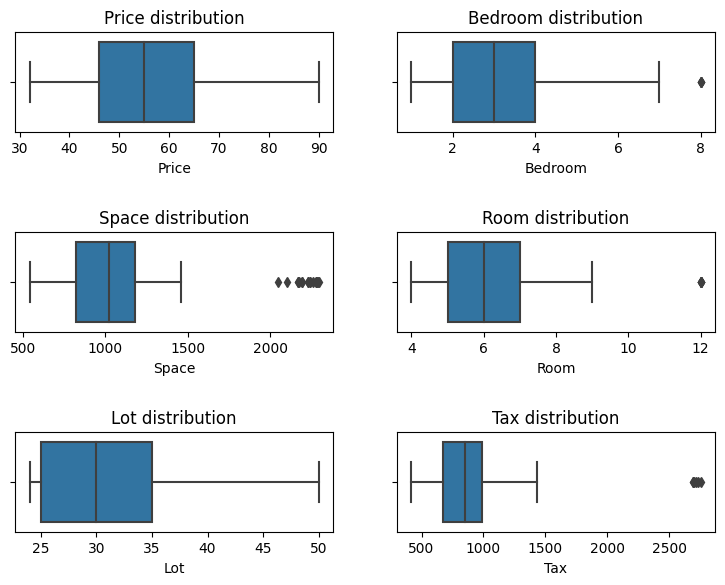

In [12]:
#boxplots
plt.figure(figsize=(10, 10))
i = 1
for col in df.drop(columns=["Condition","Garage","Bathroom"]).columns:
    plt.subplot(3,2,i)
    sn.boxplot(data=df, x=col)
    plt.title(col+" distribution")
    i=i+1
plt.subplots_adjust(left=0.2,bottom=0.5,right=0.9,top=1,wspace=0.2, hspace=1)
plt.show()